# HRP Portfolio Optimization

In [79]:
%load_ext autoreload
%autoreload 2
# imports
from src.DataProvider import DataProvider
from src.models.HRP_allocation import HRP


import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# Fetch data
tickers = [
    "^FTSE",
    "SPY",
    "GOLD",
    "^GDAXI",
    "^RUT",
    "AAPL",
    "BAC",
    "NVDA",
    "MSTR",
    "BA",
    "FLUT",
    "TSM",
    "JPM",
    "^N225"
]
start = "2003-01-01"
end = "2023-12-31"

data_provider = DataProvider(tickers, start, end)
data = data_provider.fetch()
data.head()


[*********************100%***********************]  14 of 14 completed


Ticker,AAPL,BA,BAC,FLUT,GOLD,JPM,MSTR,NVDA,SPY,TSM,^FTSE,^GDAXI,^N225,^RUT
Date,,,,,,,,,,,,,,
2003-01-06 00:00:00+00:00,0.224690,23.015295,21.179176,4.8,11.383023,15.245369,1.690,0.101727,61.804367,2.885124,4001.399902,3157.250000,8713.330078,397.000000
2003-01-07 00:00:00+00:00,0.223937,22.455589,21.211882,4.8,11.158121,15.169080,1.765,0.101421,61.651436,2.896438,3957.399902,3112.770020,8656.500000,393.950012
2003-01-08 00:00:00+00:00,0.219412,22.590466,21.125681,4.8,11.339492,14.586084,1.685,0.091332,60.760574,2.771981,3924.800049,2993.000000,8517.799805,389.070007
2003-01-09 00:00:00+00:00,0.221373,22.860197,21.402121,4.8,11.179885,14.874866,1.730,0.092937,61.704620,2.922837,3934.000000,3037.679932,8497.929688,395.940002
2003-01-10 00:00:00+00:00,0.221976,22.826471,21.342672,4.8,11.361261,14.760437,1.701,0.094542,61.870865,3.017124,3974.100098,3037.330078,8470.450195,396.440002


<Axes: title={'center': 'Data Overview'}, xlabel='Date', ylabel='Price'>

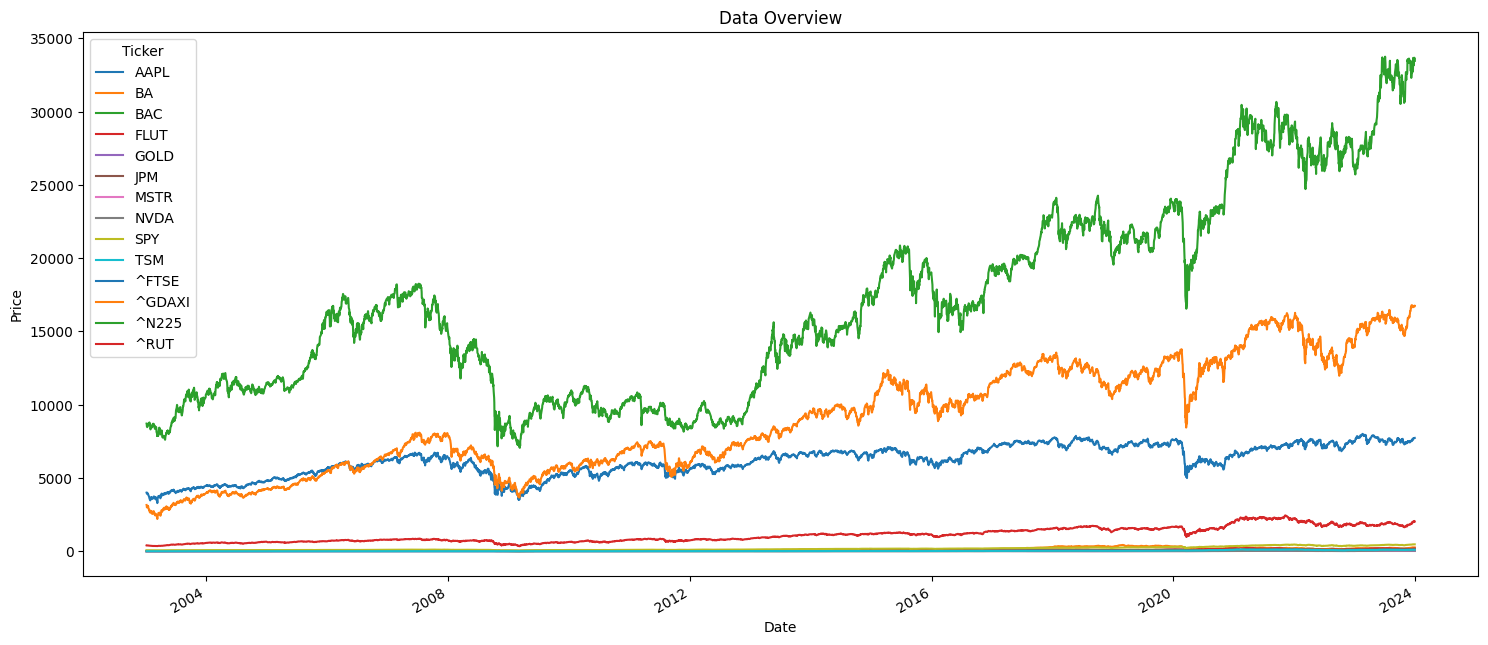

In [47]:
data.plot(figsize=(18, 8), ylabel="Price", title="Data Overview")

In [51]:
data.shape

(4854, 14)

In [56]:
# Transformation
X = data.copy("deep")
rows = len(X)
training_rows = int(rows * 0.8) # amount of training rows (80%)
training_rows


3883

In [57]:
X_train = X.head(training_rows)
X_test = X.tail(rows - training_rows)

# calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [58]:
def correlaiton_distance(corr):
    dist = ((1 - corr) / 2.0) ** 0.5
    return dist

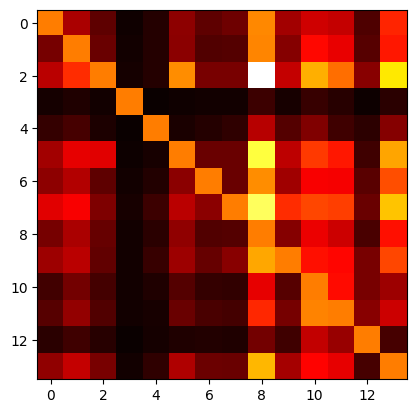

In [74]:
sigmas = returns.cov()

D = 1 / np.sqrt(np.diag(sigmas)) # takes the inverse of sqrt of diag.
corr =  D * sigmas * D
# corr = returns.corr()

plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.show()
# returns.corr()


In [63]:
# Calculate linkage
dist = correlaiton_distance(returns.corr())
link = linkage(dist, "ward") # TODO: investigate what this does
link[0]

/var/folders/bc/hnzwjdn546lcc572zg36k_vc0000gn/T/ipykernel_79448/861281921.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, "ward") # TODO: investigate what this does


array([ 8.        , 13.        ,  0.33174373,  2.        ])

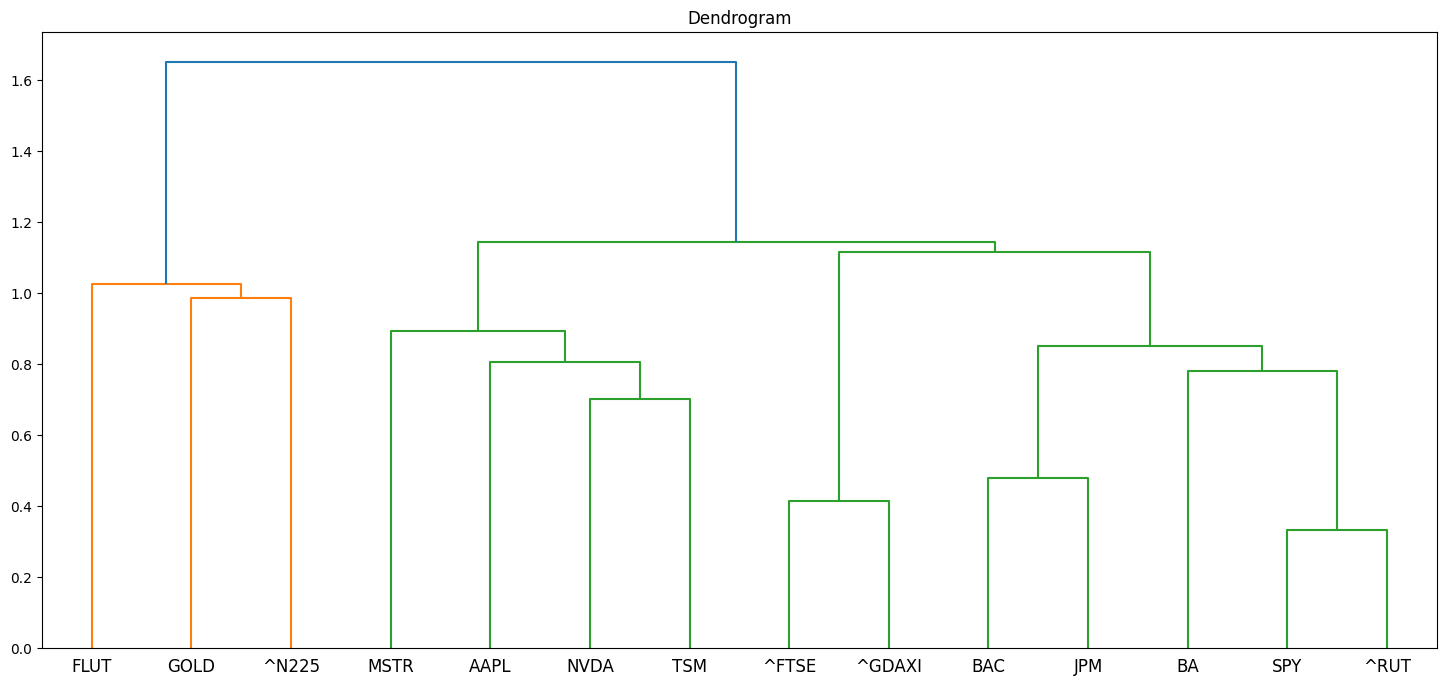

In [64]:
# Plot dendogram
plt.figure(figsize=(18, 8))
plt.title("Dendrogram")
dendrogram(link, labels = X.columns)
plt.show()

In [92]:
hrp = HRP()
hrp.getQuasiDiag(link)
# link[-1,1]


[3, 4, 12, 6, 0, 7, 9, 10, 11, 2, 5, 1, 8, 13]